In [ ]:
# Step-by-step: Read Excel and list features (columns) with details
# Save as: read_and_list_features.py

import pandas as pd
from typing import Optional

def find_data_sheet(xlsx_path: str) -> Optional[str]:
    """
    Return the sheet name that likely contains the data table.
    Heuristics:
      - Prefer sheets with > 2 columns
      - Avoid sheets that are data-dictionaries with columns like ['Field','Description']
    """
    xls = pd.ExcelFile(xlsx_path)
    sheets = xls.sheet_names
    candidate = None

    for s in sheets:
        df = pd.read_excel(xlsx_path, sheet_name=s, nrows=10)  # read a few rows
        cols = [c.strip() if isinstance(c, str) else c for c in df.columns]
        # If sheet looks like a "Field / Description" dictionary, skip it
        low_col_names = [str(c).lower() for c in cols]
        if set(low_col_names) == {"field", "description"}:
            # likely data dictionary -> skip
            continue
        # prefer sheet with more than 2 columns
        if len(cols) > 2:
            return s
        # keep last-resort candidate
        if candidate is None:
            candidate = s

    return candidate  # could be None if file empty

def load_best_sheet(xlsx_path: str) -> pd.DataFrame:
    """
    Loads the best sheet determined by heuristics.
    """
    xls = pd.ExcelFile(xlsx_path)
    print("Sheets in workbook:", xls.sheet_names)
    best = find_data_sheet(xlsx_path)
    if best is None:
        raise ValueError("No suitable sheet found in the workbook.")
    print(f"Loading sheet: '{best}'")
    df = pd.read_excel(xlsx_path, sheet_name=best)
    # strip whitespace from column names (common issue)
    df.columns = [str(c).strip() for c in df.columns]
    return df

def describe_features(df: pd.DataFrame, show_sample: bool = True, sample_n: int = 3) -> pd.DataFrame:
    """
    Prints and returns a DataFrame summarizing each feature/column:
      - dtype, non-null count, null count, unique count, sample values
    """
    cols = []
    for c in df.columns:
        col_dtype = df[c].dtype
        non_null = int(df[c].notna().sum())
        nulls = int(df[c].isna().sum())
        uniques = int(df[c].nunique(dropna=True))
        sample_vals = df[c].dropna().astype(str).unique()[:sample_n].tolist()
        cols.append({
            "feature": c,
            "dtype": str(col_dtype),
            "non_null_count": non_null,
            "null_count": nulls,
            "unique_values": uniques,
            "sample_values": sample_vals
        })

    summary_df = pd.DataFrame(cols).set_index("feature")
    # print nicely
    pd.set_option('display.max_colwidth', 200)
    print("\n=== Feature Summary ===")
    print(summary_df)
    if show_sample:
        print("\n=== Sample Rows ===")
        display_df = df.head(sample_n).copy()
        print(display_df.to_string(index=False))
    return summary_df

if __name__ == "__main__":
    # ==== USER SETTINGS ====
    excel_file = "/content/Pharmaceutical_sales_ data.xlsx"   # <-- change to your file path
    # =======================

    # 1) Load the best sheet
    try:
        df = load_best_sheet(excel_file)
    except Exception as e:
        print("Error loading workbook:", e)
        raise

    # 2) Quick info about dataframe
    print("\nDataframe shape (rows, cols):", df.shape)
    print("\nDataframe dtypes:")
    print(df.dtypes)

    # 3) Feature summary: dtype, nulls, uniques, sample values
    feature_summary = describe_features(df, show_sample=True, sample_n=5)

    # 4) Save feature summary to CSV for later
    feature_summary.to_csv("feature_summary.csv")
    print("\n✅ Feature summary saved to 'feature_summary.csv'")

    # 5) Optional: Print columns list
    print("\nColumns / Features (list):")
    for i, col in enumerate(df.columns, 1):
        print(f"{i}. {col}")


Error loading workbook: [Errno 2] No such file or directory: '/content/Pharmaceutical_sales_ data.xlsx'


FileNotFoundError: [Errno 2] No such file or directory: '/content/Pharmaceutical_sales_ data.xlsx'

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254082 entries, 0 to 254081
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Distributor        254082 non-null  object 
 1   Customer Name      254082 non-null  object 
 2   City               254082 non-null  object 
 3   Country            254082 non-null  object 
 4   Latitude           254082 non-null  float64
 5   Longitude          254082 non-null  float64
 6   Channel            254082 non-null  object 
 7   Sub-channel        254082 non-null  object 
 8   Product Name       254082 non-null  object 
 9   Product Class      254082 non-null  object 
 10  Quantity           254082 non-null  float64
 11  Price              254082 non-null  int64  
 12  Sales              254082 non-null  float64
 13  Month              254082 non-null  object 
 14  Year               254082 non-null  int64  
 15  Name of Sales Rep  254082 non-

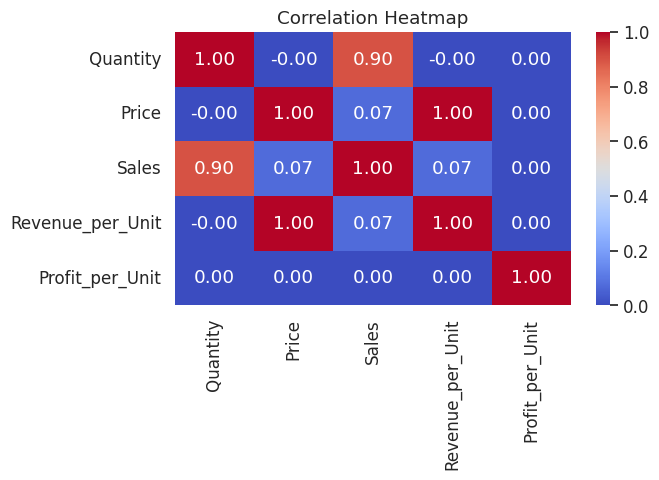

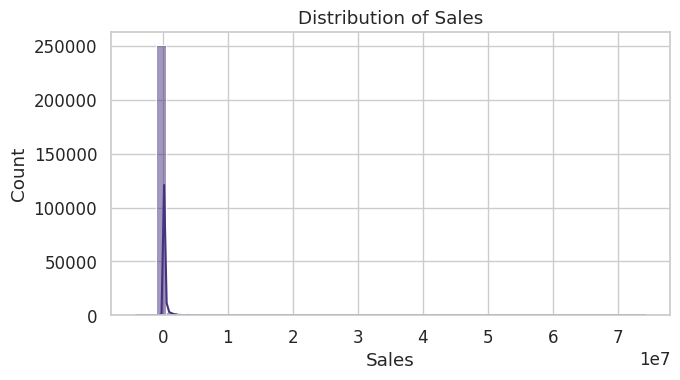

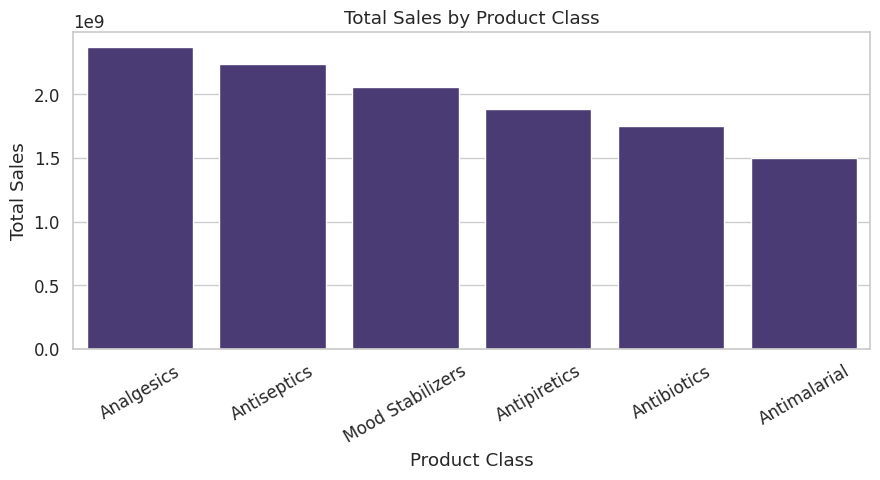

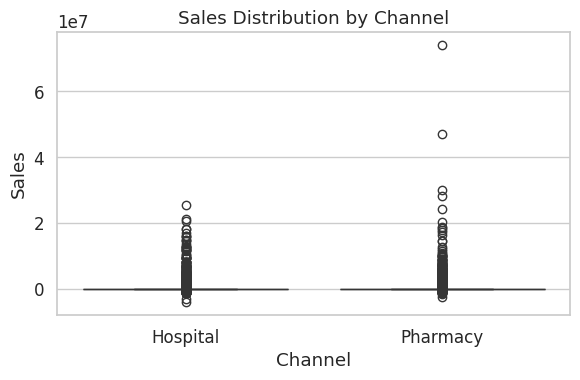

/tmp/ipython-input-842959562.py:100: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Sub-channel', y='Sales', estimator=sum, ci=None)


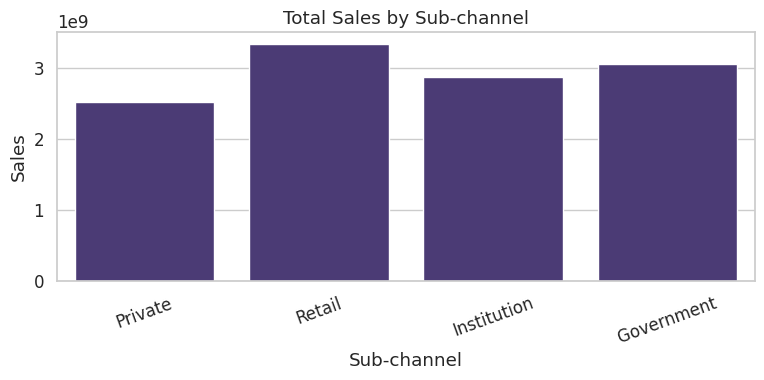

/tmp/ipython-input-842959562.py:110: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Country', y='Sales', estimator=sum, ci=None)


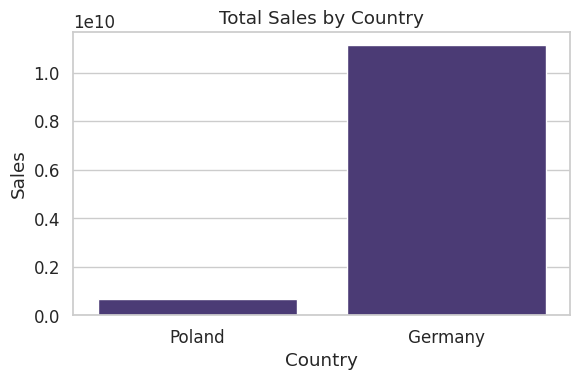

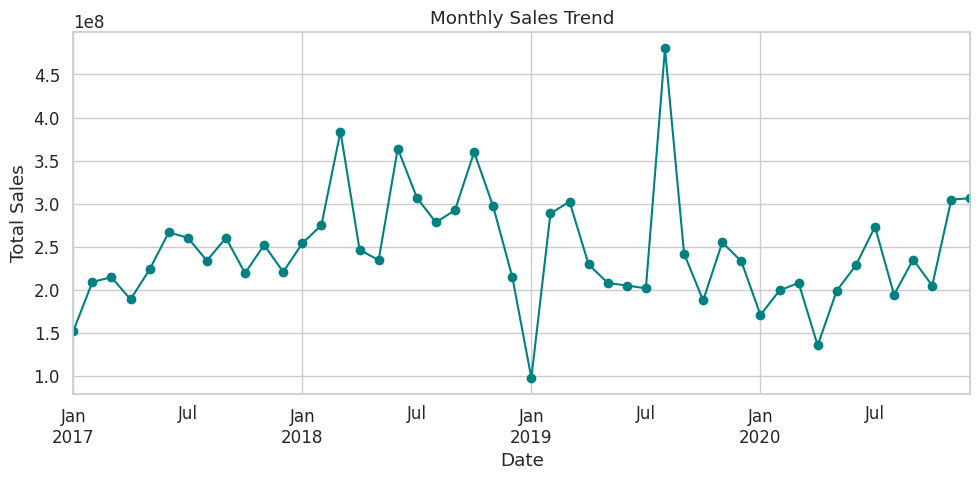

/tmp/ipython-input-842959562.py:132: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sales Team', y='Sales', data=df, estimator=sum, ci=None)


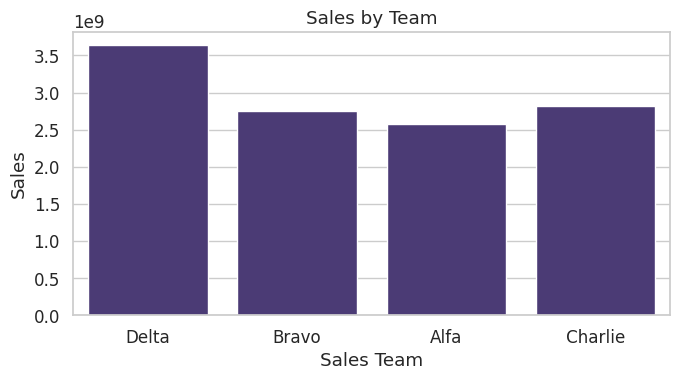

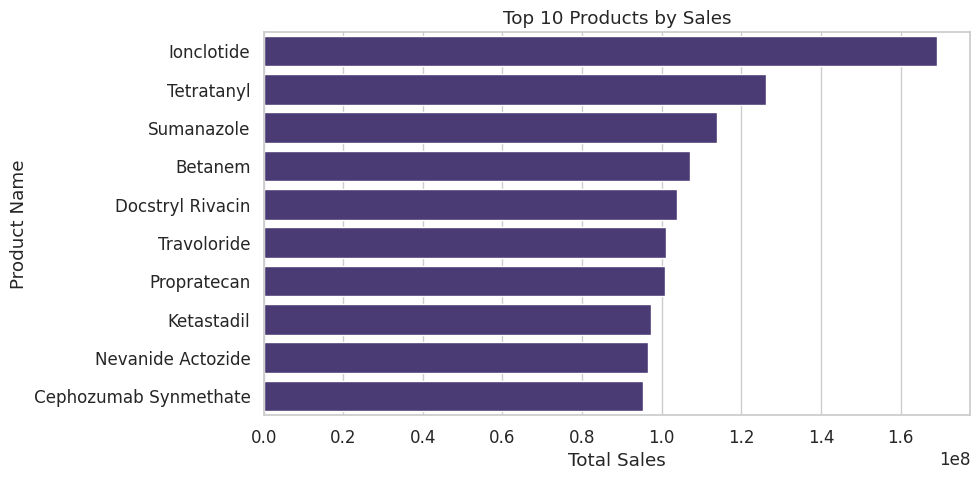

/tmp/ipython-input-842959562.py:153: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Manager', y='Sales', data=df, estimator=sum, ci=None)


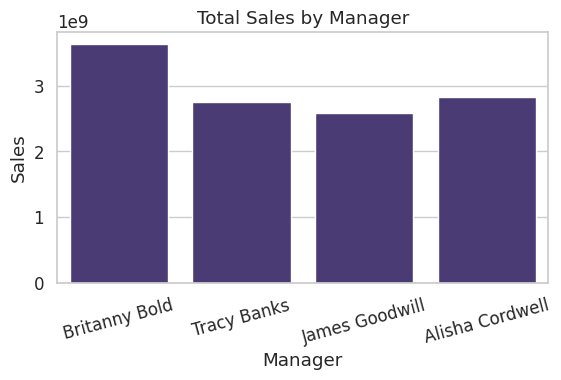

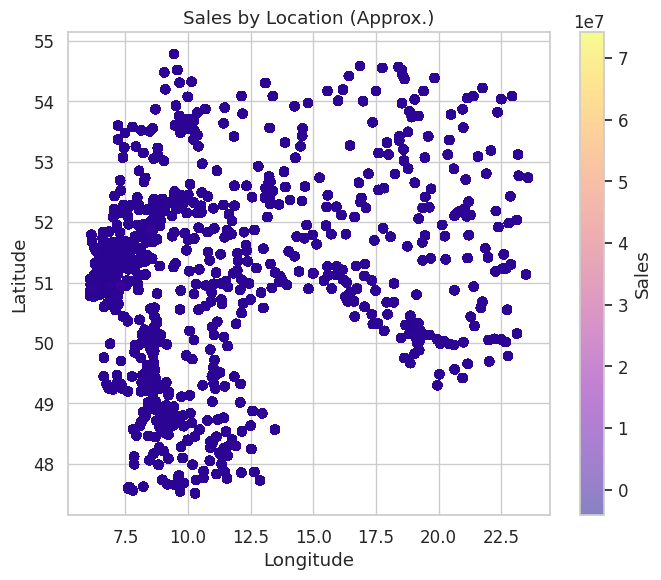

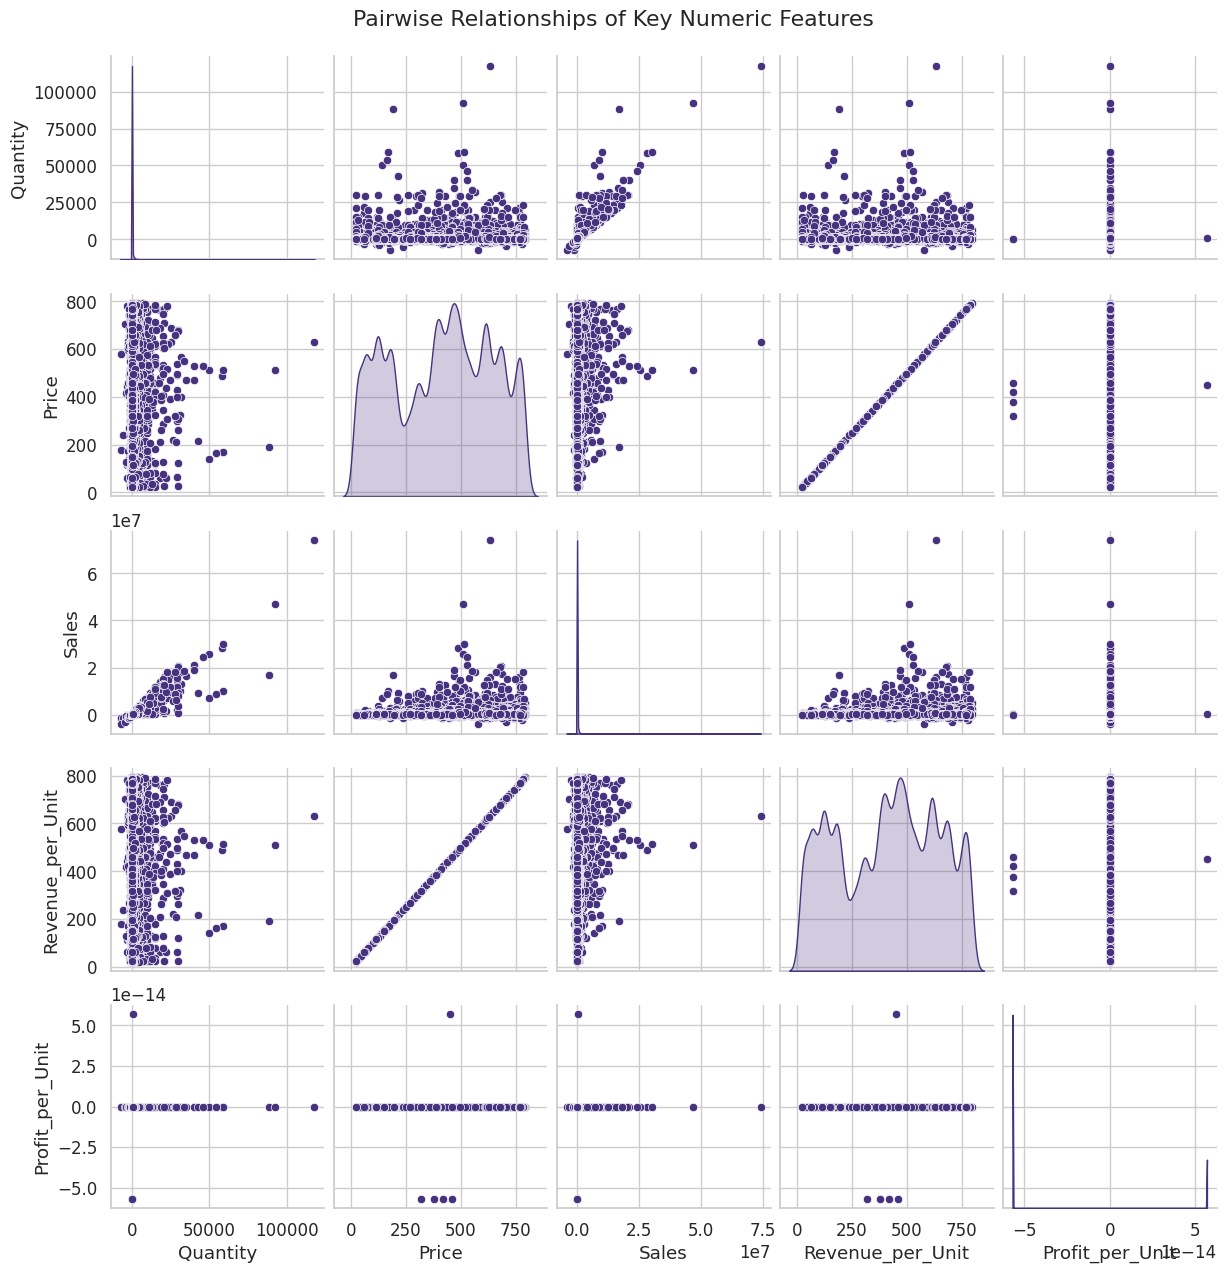


=== Aggregated Insights ===
Top 5 Managers by Sales:
Manager
Britanny Bold      3.635341e+09
Alisha Cordwell    2.824970e+09
Tracy Banks        2.757702e+09
James Goodwill     2.580974e+09
Name: Sales, dtype: float64 

Top 5 Cities by Sales:
City
Butzbach      93561780.0
Baesweiler    64890501.0
Cuxhaven      56006680.0
Friedberg     52183634.6
Altenburg     50885320.0
Name: Sales, dtype: float64 

Top 5 Sales Reps by Sales:
Name of Sales Rep
Jimmy Grey          9.859700e+08
Abigail Thompson    9.810570e+08
Sheila Stones       9.582039e+08
Daniel Gates        9.506586e+08
Anne Wu             9.201683e+08
Name: Sales, dtype: float64 


✅ Cleaned data with new features saved as 'cleaned_sales_with_features.xlsx'


In [ ]:
# ===============================================
# SALES DATA - Exploratory Data Analysis (EDA)
# ===============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: better plot styling
sns.set(style="whitegrid", palette="viridis", font_scale=1.1)

# ---------------------------------------------------
# 1. Load Data
# ---------------------------------------------------
file_path = "/content/Pharmaceutical_sales_ data.xlsx"  # change if needed
df = pd.read_excel(file_path, sheet_name="Data")

# Clean column names
df.columns = df.columns.str.strip()

# ---------------------------------------------------
# 2. Basic Overview
# ---------------------------------------------------
print("=== Dataset Info ===")
print(df.info())
print("\n=== Missing Values ===")
print(df.isnull().sum())
print("\n=== Duplicate Rows:", df.duplicated().sum(), "===")

# ---------------------------------------------------
# 3. Data Cleaning & Feature Engineering
# ---------------------------------------------------
# Convert numeric columns properly
numeric_cols = ['Latitude', 'Longitude', 'Quantity', 'Price', 'Sales']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Create datetime column
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str), format='%B %Y')

# Revenue per unit
df['Revenue_per_Unit'] = df['Sales'] / df['Quantity']
df['Profit_per_Unit'] = df['Revenue_per_Unit'] - df['Price']

# Extract month number and quarter
df['Month_Num'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.to_period("Q").astype(str)

# ---------------------------------------------------
# 4. Descriptive Statistics
# ---------------------------------------------------
print("\n=== Summary Statistics ===")
print(df.describe(include='all').T)

# ---------------------------------------------------
# 5. Correlation Heatmap
# ---------------------------------------------------
plt.figure(figsize=(7,5))
sns.heatmap(df[['Quantity','Price','Sales','Revenue_per_Unit','Profit_per_Unit']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 6. Sales Distribution
# ---------------------------------------------------
plt.figure(figsize=(7,4))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Distribution of Sales")
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 7. Total Sales by Product Class
# ---------------------------------------------------
plt.figure(figsize=(9,5))
sales_by_class = df.groupby('Product Class')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_class.index, y=sales_by_class.values)
plt.title("Total Sales by Product Class")
plt.ylabel("Total Sales")
plt.xlabel("Product Class")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 8. Sales by Channel
# ---------------------------------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x='Channel', y='Sales', data=df)
plt.title("Sales Distribution by Channel")
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 9. Sub-channel Performance
# ---------------------------------------------------
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='Sub-channel', y='Sales', estimator=sum, ci=None)
plt.title("Total Sales by Sub-channel")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 10. Sales by Country
# ---------------------------------------------------
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Country', y='Sales', estimator=sum, ci=None)
plt.title("Total Sales by Country")
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 11. Sales Over Time
# ---------------------------------------------------
plt.figure(figsize=(10,5))
monthly_sales = df.groupby('Date')['Sales'].sum()
monthly_sales.plot(marker='o', color='teal')
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 12. Sales by Sales Team
# ---------------------------------------------------
plt.figure(figsize=(7,4))
sns.barplot(x='Sales Team', y='Sales', data=df, estimator=sum, ci=None)
plt.title("Sales by Team")
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 13. Top 10 Products by Total Sales
# ---------------------------------------------------
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(y=top_products.index, x=top_products.values)
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 14. Sales by Manager
# ---------------------------------------------------
plt.figure(figsize=(6,4))
sns.barplot(x='Manager', y='Sales', data=df, estimator=sum, ci=None)
plt.title("Total Sales by Manager")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 15. Geographical Sales (Latitude vs Longitude)
# ---------------------------------------------------
plt.figure(figsize=(7,6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Sales'], cmap='plasma', alpha=0.5)
plt.colorbar(label="Sales")
plt.title("Sales by Location (Approx.)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 16. Pairplot of numeric relationships
# ---------------------------------------------------
sns.pairplot(df[['Quantity','Price','Sales','Revenue_per_Unit','Profit_per_Unit']], diag_kind="kde")
plt.suptitle("Pairwise Relationships of Key Numeric Features", y=1.02)
plt.show()

# ---------------------------------------------------
# 17. Aggregated Insights
# ---------------------------------------------------
print("\n=== Aggregated Insights ===")
print("Top 5 Managers by Sales:")
print(df.groupby('Manager')['Sales'].sum().sort_values(ascending=False).head(), "\n")

print("Top 5 Cities by Sales:")
print(df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(), "\n")

print("Top 5 Sales Reps by Sales:")
print(df.groupby('Name of Sales Rep')['Sales'].sum().sort_values(ascending=False).head(), "\n")

# ---------------------------------------------------
# 18. Save cleaned + engineered data
# ---------------------------------------------------
df.to_excel("cleaned_sales_with_features.xlsx", index=False)
print("\n✅ Cleaned data with new features saved as 'cleaned_sales_with_features.xlsx'")


     Month  Quantity            Product Name
0  January       4.0              Topipizole
1  January       7.0            Choriotrisin
2  January      30.0               Acantaine
3  January       6.0    Lioletine Refliruvax
4  January      20.0  Oxymotroban Fexoformin

=== Data Types ===
Month            object
Quantity        float64
Product Name     object
dtype: object

=== Correlation Matrix ===
                     Month_Encoded  Quantity  ProductName_Encoded
Month_Encoded             1.000000 -0.002356            -0.001589
Quantity                 -0.002356  1.000000             0.001761
ProductName_Encoded      -0.001589  0.001761             1.000000


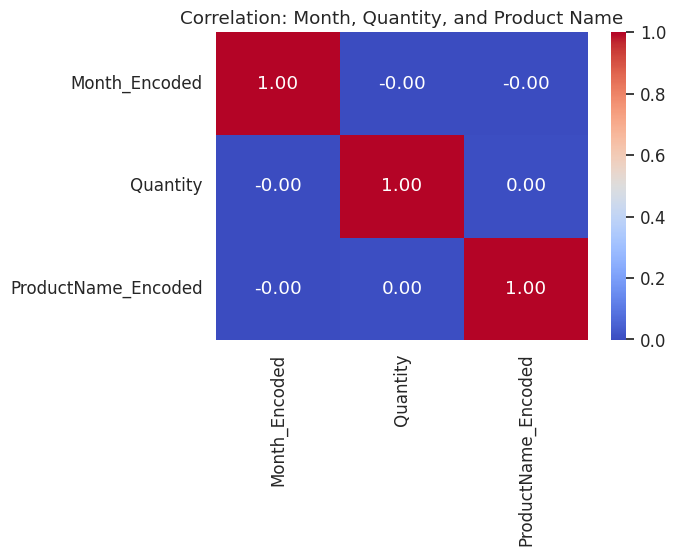

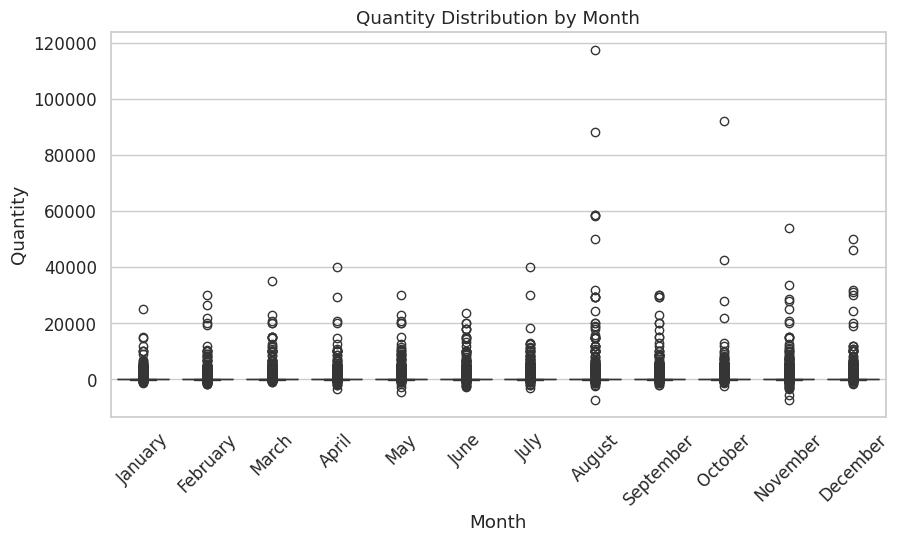

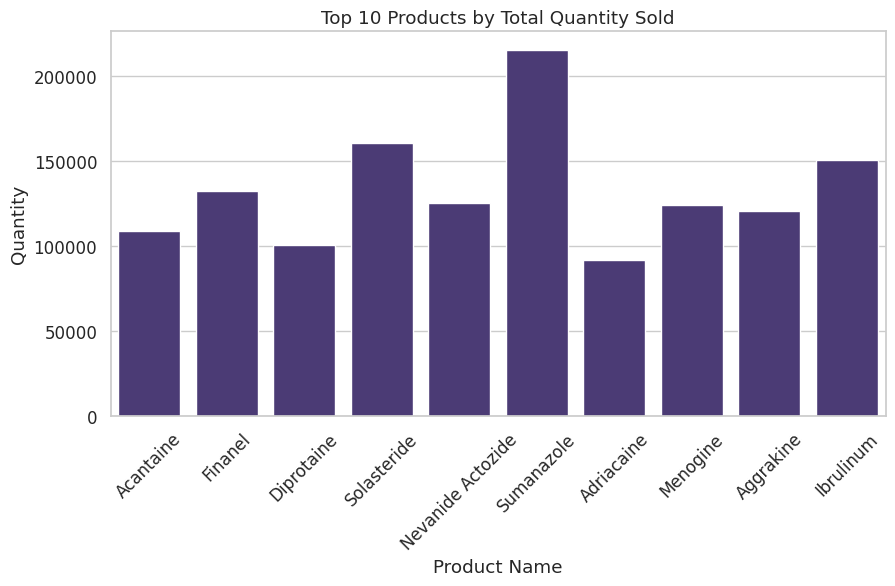

In [ ]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Step 2: Load your cleaned dataset
df = pd.read_excel("cleaned_sales_with_features.xlsx")

# Step 3: Display relevant columns
print(df[['Month', 'Quantity', 'Product Name']].head())

# Step 4: Check datatypes
print("\n=== Data Types ===")
print(df[['Month', 'Quantity', 'Product Name']].dtypes)

# Step 5: Encode 'Month' and 'Product Name' for correlation
# (Since correlation requires numeric values)
le_month = LabelEncoder()
le_product = LabelEncoder()

df['Month_Encoded'] = le_month.fit_transform(df['Month'])
df['ProductName_Encoded'] = le_product.fit_transform(df['Product Name'])

# Step 6: Create correlation dataframe
corr_df = df[['Month_Encoded', 'Quantity', 'ProductName_Encoded']]

# Step 7: Compute correlation matrix
corr_matrix = corr_df.corr()
print("\n=== Correlation Matrix ===")
print(corr_matrix)

# Step 8: Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation: Month, Quantity, and Product Name")
plt.show()

# Step 9: Optional — see trends visually
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Month', y='Quantity')
plt.title('Quantity Distribution by Month')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
top_products = df['Product Name'].value_counts().head(10).index
sns.barplot(data=df[df['Product Name'].isin(top_products)],
            x='Product Name', y='Quantity', estimator=sum, errorbar=None)
plt.title('Top 10 Products by Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


Library Versions:
pandas: 2.2.2
numpy: 2.0.2
scikit-learn: 2.2.2
tensorflow: 2.19.0
xgboost: 3.0.5

Data Shape: (254082, 7)
Unique Products: 240

Processing Product 1/5: Abatatriptan
Train: 652, Val: 217, Test: 219

TRAIN METRICS:
{'Model': 'LSTM', 'MAE': 110.06330567111587, 'RMSE': np.float64(188.50244387635072), 'R2': -0.011349318774654282, 'MAPE': 15.266000899348054}
{'Model': 'GRU', 'MAE': 119.28660381299505, 'RMSE': np.float64(190.56270441733818), 'R2': -0.033577463595571455, 'MAPE': 17.429896500699297}
{'Model': 'ARIMA', 'MAE': 97.87055268830586, 'RMSE': np.float64(187.11314537409166), 'R2': -0.0005519646221041619, 'MAPE': 11.890639099853795}
{'Model': 'XGBoost', 'MAE': 93.14026953106277, 'RMSE': np.float64(183.0389737069888), 'R2': 0.042545390129867466, 'MAPE': 10.927632684596038}

VALIDATION METRICS:
{'Model': 'LSTM', 'MAE': 150.63391911379205, 'RMSE': np.float64(447.2845992941367), 'R2': -0.001384676589109235, 'MAPE': 11.71734392242946}
{'Model': 'GRU', 'MAE': 160.363431482271

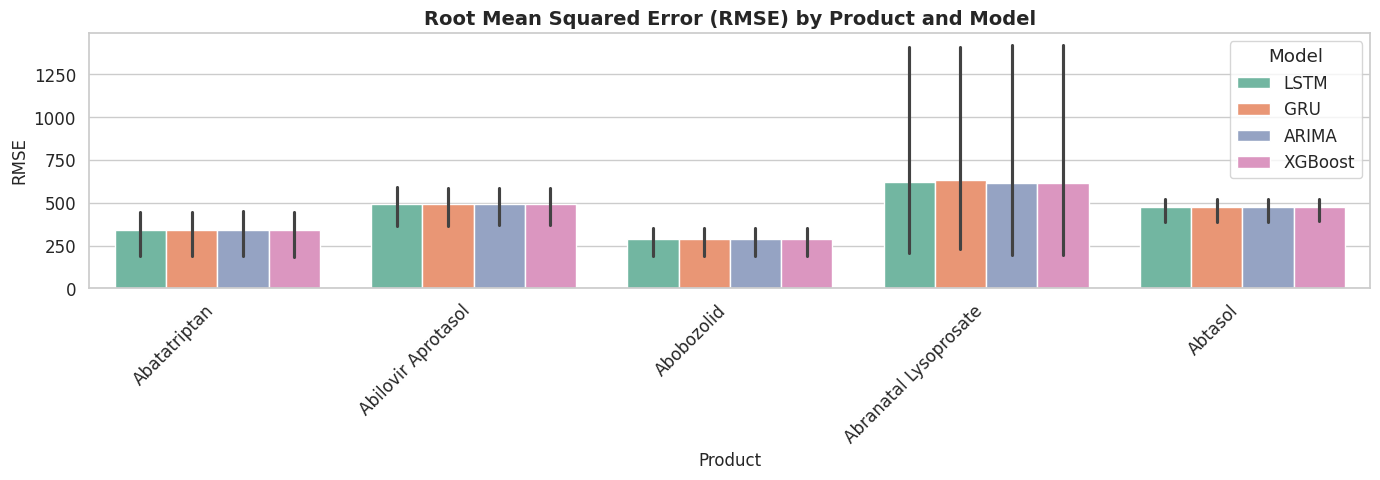

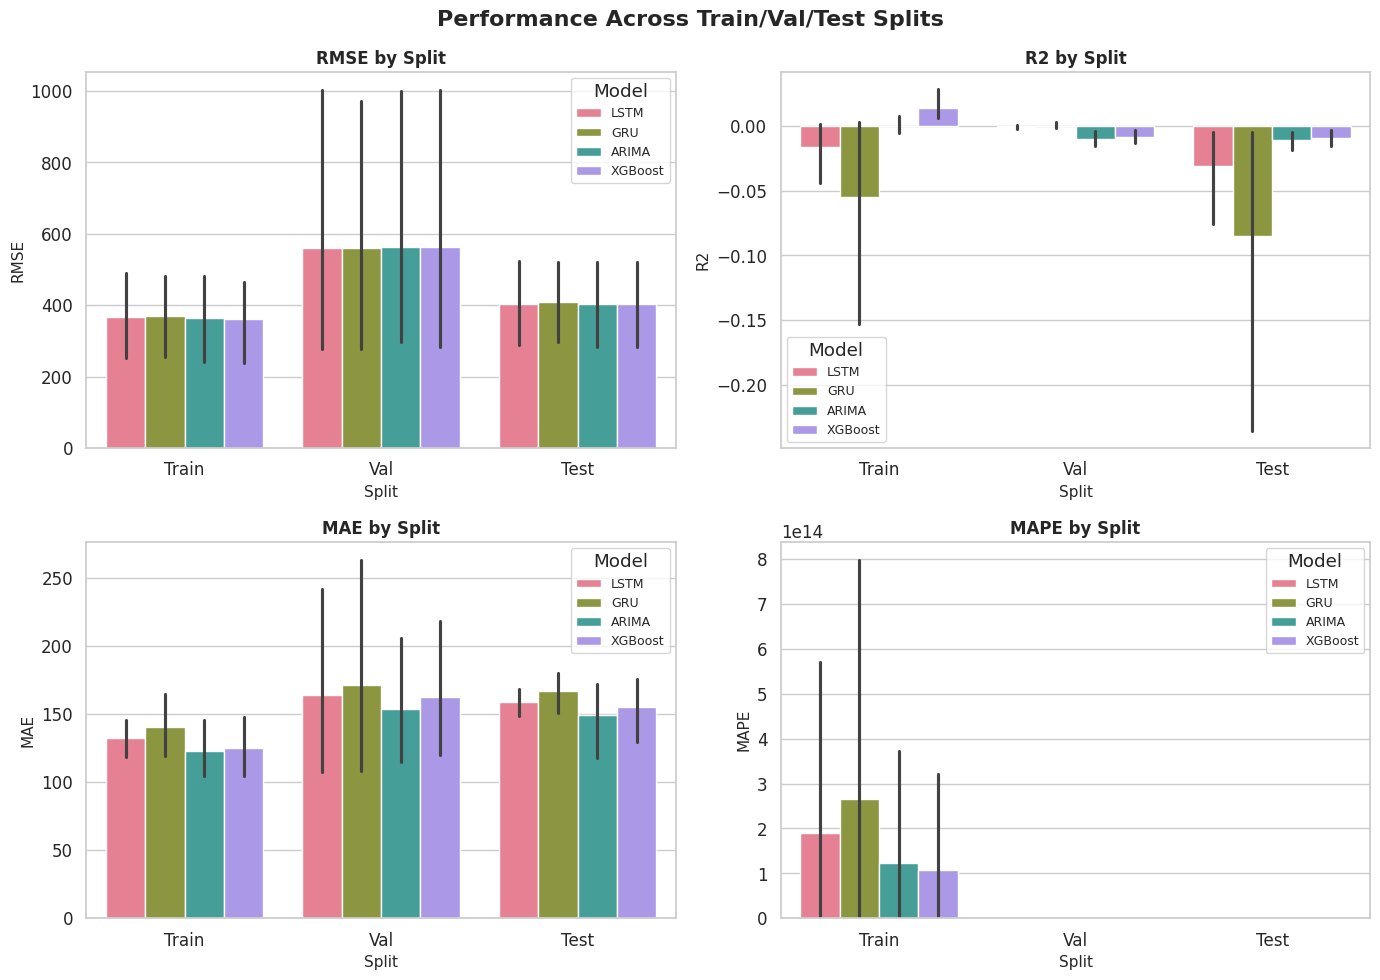

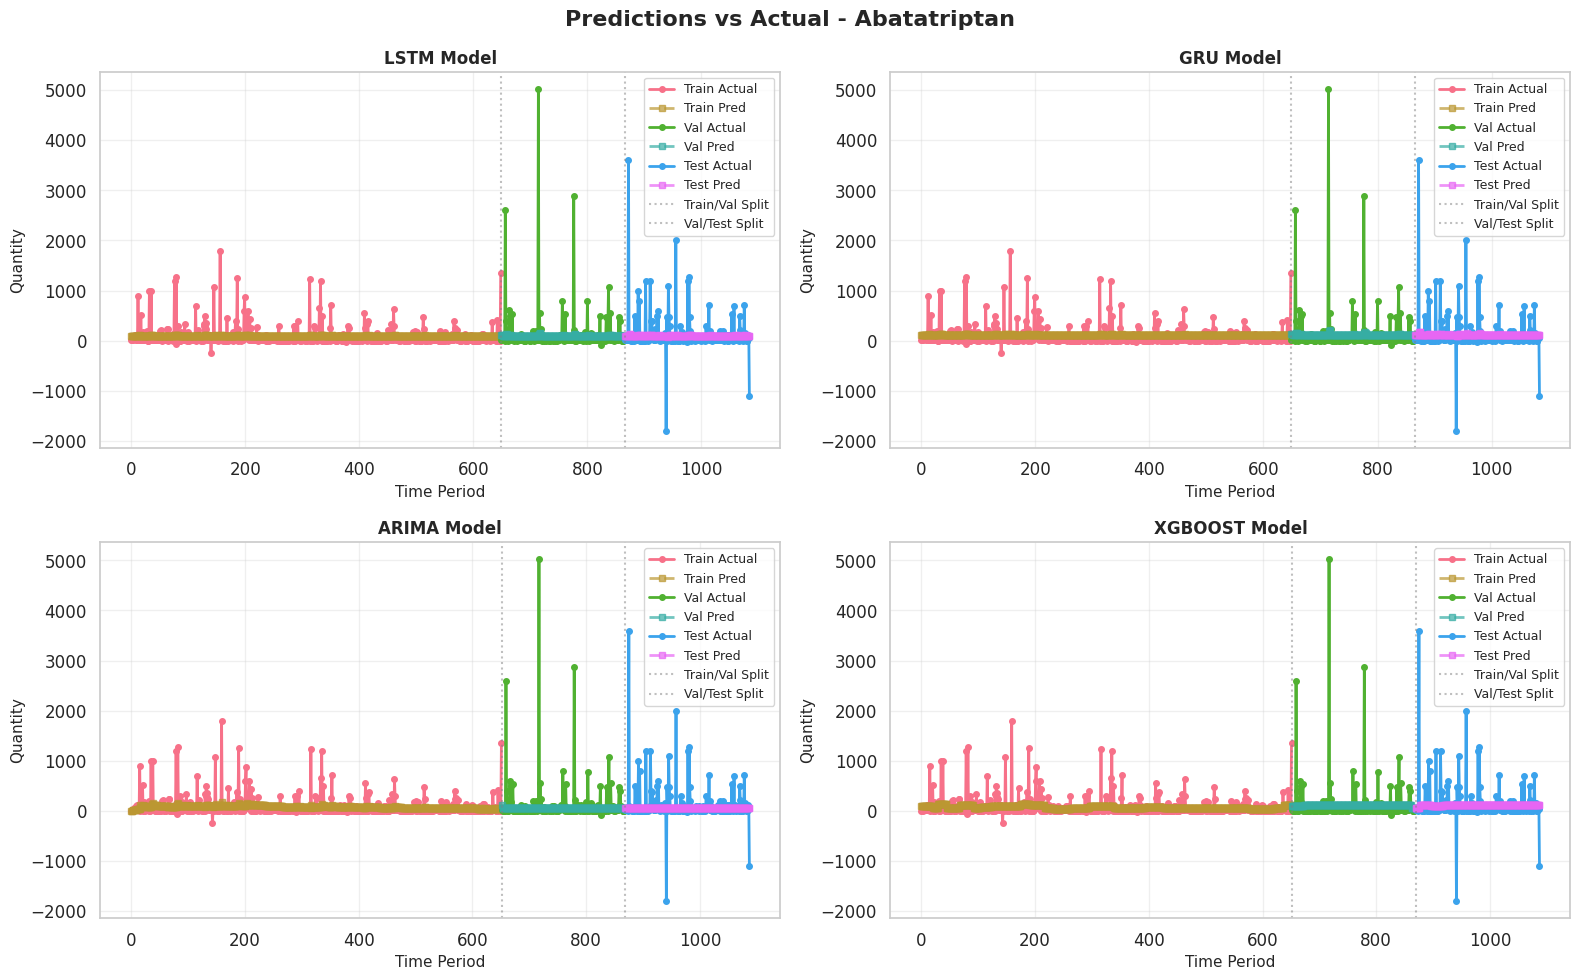

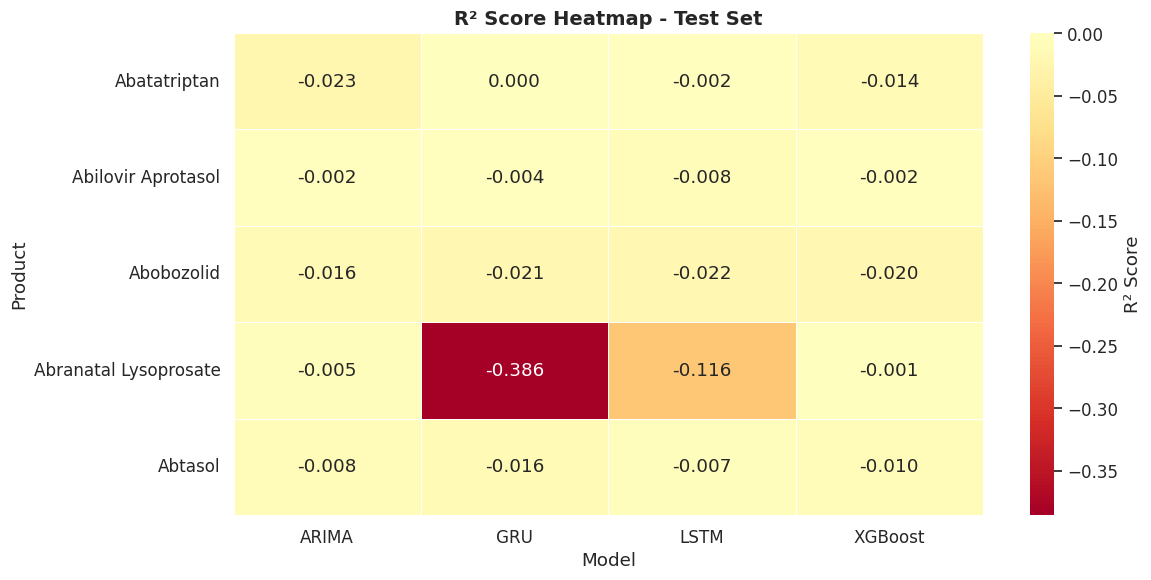


✓ Analysis complete! Visualizations saved as PNG files.


In [ ]:
# ===============================================
# PHARMACEUTICAL SALES FORECASTING PIPELINE
# LSTM, GRU, ARIMA, XGBoost with Train/Val/Test Split
# ===============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import xgboost as xgb
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# ===============================================
# LIBRARY VERSIONS
# ===============================================
print("Library Versions:")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {pd.__version__ if hasattr(pd, '__version__') else 'N/A'}")
print(f"tensorflow: {tf.__version__}")
print(f"xgboost: {xgb.__version__}")
print()

sns.set(style="whitegrid", palette="husl", font_scale=1.1)

# ===============================================
# 1. LOAD AND PREPROCESS DATA
# ===============================================
file_path = "cleaned_sales_with_features.xlsx"
df = pd.read_excel(file_path)

# Keep relevant columns
df = df[['Month', 'Year', 'Product Name', 'Quantity']].copy()

# Encode month as number
month_map = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,
             'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
df['Month_Num'] = df['Month'].map(month_map)

# Encode Product Name
le_product = LabelEncoder()
df['Product_Encoded'] = le_product.fit_transform(df['Product Name'])

# Create date column and sort
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month_Num'].astype(str) + '-01')
df = df.sort_values(['Product_Encoded', 'Date']).reset_index(drop=True)

print("Data Shape:", df.shape)
print("Unique Products:", df['Product Name'].nunique())

# ===============================================
# 2. HELPER FUNCTIONS
# ===============================================

def create_sequences(data, seq_len=3):
    """Create sequences for LSTM/GRU"""
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

def calculate_metrics(y_true, y_pred, model_name):
    """Calculate comprehensive metrics"""
    # Ensure y_true and y_pred have the same length
    min_len = min(len(y_true), len(y_pred))
    y_true = y_true[:min_len]
    y_pred = y_pred[:min_len]

    if min_len == 0:
        return {
            'Model': model_name,
            'MAE': np.nan,
            'RMSE': np.nan,
            'R2': np.nan,
            'MAPE': np.nan
        }

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return {
        'Model': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'MAPE': mape
    }

# ===============================================
# 3. TRAIN/VALIDATION/TEST SPLIT STRATEGY
# ===============================================
train_ratio = 0.60
val_ratio = 0.20
test_ratio = 0.20

results_all = []
predictions_all = {}

# ===============================================
# 4. MODELING LOOP PER PRODUCT
# ===============================================
products = df['Product_Encoded'].unique()[:5]  # Top 5 products

for idx, pid in enumerate(products):
    product_name = le_product.inverse_transform([pid])[0]
    print(f"\n{'='*60}")
    print(f"Processing Product {idx+1}/{len(products)}: {product_name}")
    print('='*60)

    prod_df = df[df['Product_Encoded'] == pid].reset_index(drop=True)
    n = len(prod_df)

    # Calculate split indices
    n_train = int(n * train_ratio)
    n_val = int(n * val_ratio)
    n_test = n - n_train - n_val

    train_data = prod_df.iloc[:n_train].copy()
    val_data = prod_df.iloc[n_train:n_train+n_val].copy()
    test_data = prod_df.iloc[n_train+n_val:].copy()

    print(f"Train: {len(train_data)}, Val: {len(val_data)}, Test: {len(test_data)}")

    # Feature engineering
    for dataset in [train_data, val_data, test_data]:
        dataset['Month_sin'] = np.sin(2*np.pi*dataset['Month_Num']/12)
        dataset['Month_cos'] = np.cos(2*np.pi*dataset['Month_Num']/12)

    # -----------------------------------------------
    # PREPROCESSING FOR NEURAL NETWORKS
    # -----------------------------------------------
    scaler = MinMaxScaler()
    # Scale the entire product data before creating sequences
    scaled_qty = scaler.fit_transform(prod_df[['Quantity']])

    seq_len = 3
    # Create sequences from the scaled data of the entire product
    X_seq, y_seq = create_sequences(scaled_qty, seq_len)

    # Split sequences based on the original data split indices
    # Note: Sequences lose the first `seq_len` data points
    # The first `seq_len` items in `prod_df` do not have a corresponding prediction target in `y_seq`.
    # So, the actual values for comparison should start from index `seq_len`.
    train_end_idx_nn = n_train - seq_len
    val_end_idx_nn = n_train + n_val - seq_len

    X_train_nn = X_seq[:train_end_idx_nn]
    X_val_nn = X_seq[train_end_idx_nn:val_end_idx_nn]
    X_test_nn = X_seq[val_end_idx_nn:]

    y_train_nn = y_seq[:train_end_idx_nn]
    y_val_nn = y_seq[train_end_idx_nn:val_end_idx_nn]
    y_test_nn = y_seq[val_end_idx_nn:]

    # Corresponding actual values for NN predictions
    y_train_actual_nn = prod_df['Quantity'].values[seq_len:n_train]
    y_val_actual_nn = prod_df['Quantity'].values[n_train:n_train+n_val]
    y_test_actual_nn = prod_df['Quantity'].values[n_train+n_val:]


    # -----------------------------------------------
    # 1. LSTM MODEL
    # -----------------------------------------------
    lstm_model = Sequential([
        LSTM(64, activation='relu', return_sequences=True, input_shape=(seq_len, 1)),
        Dropout(0.2),
        LSTM(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lstm_model.fit(X_train_nn, y_train_nn, epochs=50, batch_size=8,
                   validation_data=(X_val_nn, y_val_nn), callbacks=[early_stop], verbose=0)

    y_pred_lstm_train_scaled = lstm_model.predict(X_train_nn, verbose=0)
    y_pred_lstm_val_scaled = lstm_model.predict(X_val_nn, verbose=0)
    y_pred_lstm_test_scaled = lstm_model.predict(X_test_nn, verbose=0)

    y_pred_lstm_train = scaler.inverse_transform(y_pred_lstm_train_scaled)
    y_pred_lstm_val = scaler.inverse_transform(y_pred_lstm_val_scaled)
    y_pred_lstm_test = scaler.inverse_transform(y_pred_lstm_test_scaled)


    # -----------------------------------------------
    # 2. GRU MODEL
    # -----------------------------------------------
    gru_model = Sequential([
        GRU(64, activation='relu', return_sequences=True, input_shape=(seq_len, 1)),
        Dropout(0.2),
        GRU(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    gru_model.fit(X_train_nn, y_train_nn, epochs=50, batch_size=8,
                  validation_data=(X_val_nn, y_val_nn), callbacks=[early_stop], verbose=0)

    y_pred_gru_train_scaled = gru_model.predict(X_train_nn, verbose=0)
    y_pred_gru_val_scaled = gru_model.predict(X_val_nn, verbose=0)
    y_pred_gru_test_scaled = gru_model.predict(X_test_nn, verbose=0)

    y_pred_gru_train = scaler.inverse_transform(y_pred_gru_train_scaled)
    y_pred_gru_val = scaler.inverse_transform(y_pred_gru_val_scaled)
    y_pred_gru_test = scaler.inverse_transform(y_pred_gru_test_scaled)


    # -----------------------------------------------
    # 3. ARIMA MODEL
    # -----------------------------------------------
    try:
        # ARIMA is fitted on the training data and forecasts on subsequent periods
        arima_model = ARIMA(train_data['Quantity'].values, order=(1, 1, 1))
        arima_fit = arima_model.fit()

        # Forecast for validation and test periods
        forecast_steps_val = len(val_data)
        forecast_steps_test = len(test_data)

        # Predict on the training data (fitted values)
        y_pred_arima_train = np.array(arima_fit.fittedvalues)

        # Forecast for validation period
        y_pred_arima_val = np.array(arima_fit.get_forecast(steps=forecast_steps_val).predicted_mean)

        # Forecast for test period (starting from the end of validation)
        y_pred_arima_test = np.array(arima_fit.get_forecast(steps=forecast_steps_val + forecast_steps_test).predicted_mean)[-forecast_steps_test:]

    except Exception as e:
        print(f"ARIMA Error: {e}")
        # Fallback to mean if ARIMA fails
        y_pred_arima_train = np.full(len(train_data), train_data['Quantity'].mean())
        y_pred_arima_val = np.full(len(val_data), train_data['Quantity'].mean())
        y_pred_arima_test = np.full(len(test_data), train_data['Quantity'].mean())


    # -----------------------------------------------
    # 4. XGBOOST MODEL
    # -----------------------------------------------
    features = ['Month_Num', 'Year', 'Month_sin', 'Month_cos'] # Include Year as feature
    X_train_xgb = train_data[features].values
    y_train_xgb = train_data['Quantity'].values
    X_val_xgb = val_data[features].values
    y_val_xgb = val_data['Quantity'].values
    X_test_xgb = test_data[features].values
    y_test_xgb = test_data['Quantity'].values

    xgb_model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=200,
        max_depth=5,
        learning_rate=0.1,
        random_state=42,
        early_stopping_rounds=20,
        eval_metric='rmse'
    )
    xgb_model.fit(
        X_train_xgb, y_train_xgb,
        eval_set=[(X_val_xgb, y_val_xgb)],
        verbose=False
    )

    y_pred_xgb_train = xgb_model.predict(X_train_xgb)
    y_pred_xgb_val = xgb_model.predict(X_val_xgb)
    y_pred_xgb_test = xgb_model.predict(X_test_xgb)

    # -----------------------------------------------
    # EVALUATE ALL MODELS
    # -----------------------------------------------
    print("\nTRAIN METRICS:")
    # Use the correct actual values for each model's prediction length
    print(calculate_metrics(y_train_actual_nn, y_pred_lstm_train, 'LSTM'))
    print(calculate_metrics(y_train_actual_nn, y_pred_gru_train, 'GRU'))
    print(calculate_metrics(train_data['Quantity'].values, y_pred_arima_train, 'ARIMA')) # ARIMA train pred length matches train_data
    print(calculate_metrics(train_data['Quantity'].values, y_pred_xgb_train, 'XGBoost')) # XGBoost train pred length matches train_data

    print("\nVALIDATION METRICS:")
    print(calculate_metrics(y_val_actual_nn, y_pred_lstm_val, 'LSTM'))
    print(calculate_metrics(y_val_actual_nn, y_pred_gru_val, 'GRU'))
    print(calculate_metrics(val_data['Quantity'].values, y_pred_arima_val, 'ARIMA'))
    print(calculate_metrics(val_data['Quantity'].values, y_pred_xgb_val, 'XGBoost'))

    print("\nTEST METRICS:")
    print(calculate_metrics(y_test_actual_nn, y_pred_lstm_test, 'LSTM'))
    print(calculate_metrics(y_test_actual_nn, y_pred_gru_test, 'GRU'))
    print(calculate_metrics(test_data['Quantity'].values, y_pred_arima_test, 'ARIMA'))
    print(calculate_metrics(test_data['Quantity'].values, y_pred_xgb_test, 'XGBoost'))

    # Store results
    # Ensure actual and predicted lengths match for storing
    results_all.append({**calculate_metrics(y_train_actual_nn, y_pred_lstm_train, 'LSTM'),
                       'Product': product_name, 'Split': 'Train'})
    results_all.append({**calculate_metrics(y_val_actual_nn, y_pred_lstm_val, 'LSTM'),
                       'Product': product_name, 'Split': 'Val'})
    results_all.append({**calculate_metrics(y_test_actual_nn, y_pred_lstm_test, 'LSTM'),
                       'Product': product_name, 'Split': 'Test'})

    results_all.append({**calculate_metrics(y_train_actual_nn, y_pred_gru_train, 'GRU'),
                       'Product': product_name, 'Split': 'Train'})
    results_all.append({**calculate_metrics(y_val_actual_nn, y_pred_gru_val, 'GRU'),
                       'Product': product_name, 'Split': 'Val'})
    results_all.append({**calculate_metrics(y_test_actual_nn, y_pred_gru_test, 'GRU'),
                       'Product': product_name, 'Split': 'Test'})

    results_all.append({**calculate_metrics(train_data['Quantity'].values, y_pred_arima_train, 'ARIMA'),
                       'Product': product_name, 'Split': 'Train'})
    results_all.append({**calculate_metrics(val_data['Quantity'].values, y_pred_arima_val, 'ARIMA'),
                       'Product': product_name, 'Split': 'Val'})
    results_all.append({**calculate_metrics(test_data['Quantity'].values, y_pred_arima_test, 'ARIMA'),
                       'Product': product_name, 'Split': 'Test'})

    results_all.append({**calculate_metrics(train_data['Quantity'].values, y_pred_xgb_train, 'XGBoost'),
                       'Product': product_name, 'Split': 'Train'})
    results_all.append({**calculate_metrics(val_data['Quantity'].values, y_pred_xgb_val, 'XGBoost'),
                       'Product': product_name, 'Split': 'Val'})
    results_all.append({**calculate_metrics(test_data['Quantity'].values, y_pred_xgb_test, 'XGBoost'),
                       'Product': product_name, 'Split': 'Test'})


    # Store predictions for plotting
    # Ensure actual and predicted lengths match for storing
    predictions_all[product_name] = {
        'train_actual_nn': y_train_actual_nn, # Actual for NN (shorter)
        'val_actual_nn': y_val_actual_nn,     # Actual for NN (shorter)
        'test_actual_nn': y_test_actual_nn,   # Actual for NN (shorter)
        'train_actual_others': train_data['Quantity'].values, # Actual for ARIMA/XGBoost (full length)
        'val_actual_others': val_data['Quantity'].values,     # Actual for ARIMA/XGBoost (full length)
        'test_actual_others': test_data['Quantity'].values,   # Actual for ARIMA/XGBoost (full length)
        'lstm': (y_pred_lstm_train, y_pred_lstm_val, y_pred_lstm_test),
        'gru': (y_pred_gru_train, y_pred_gru_val, y_pred_gru_test),
        'arima': (y_pred_arima_train, y_pred_arima_val, y_pred_arima_test),
        'xgboost': (y_pred_xgb_train, y_pred_xgb_val, y_pred_xgb_test)
    }

# ===============================================
# 5. RESULTS SUMMARY
# ===============================================
results_df = pd.DataFrame(results_all)
print("\n" + "="*80)
print("COMPREHENSIVE RESULTS SUMMARY")
print("="*80)
print(results_df.to_string())

# Test Set Performance Only
test_results = results_df[results_df['Split'] == 'Test'].pivot_table(
    index='Product', columns='Model', values=['RMSE', 'R2', 'MAPE'], aggfunc='first'
)
print("\n" + "="*80)
print("TEST SET PERFORMANCE COMPARISON")
print("="*80)
print(test_results.round(4))

# ===============================================
# 6. VISUALIZATIONS
# ===============================================

# 1. Model Comparison - RMSE across splits
fig, ax = plt.subplots(figsize=(14, 5))
sns.barplot(data=results_df, x='Product', y='RMSE', hue='Model', ax=ax, palette='Set2')
ax.set_title('Root Mean Squared Error (RMSE) by Product and Model', fontsize=14, fontweight='bold')
ax.set_ylabel('RMSE', fontsize=12)
ax.set_xlabel('Product', fontsize=12)
ax.legend(title='Model', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('model_comparison_rmse.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Train/Val/Test Split Comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Performance Across Train/Val/Test Splits', fontsize=16, fontweight='bold')

metrics_to_plot = ['RMSE', 'R2', 'MAE', 'MAPE']
for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx // 2, idx % 2]
    sns.barplot(data=results_df, x='Split', y=metric, hue='Model', ax=ax, palette='husl')
    ax.set_title(f'{metric} by Split', fontsize=12, fontweight='bold')
    ax.set_ylabel(metric, fontsize=11)
    ax.set_xlabel('Split', fontsize=11)
    ax.legend(title='Model', fontsize=9)

plt.tight_layout()
plt.savefig('train_val_test_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Predictions vs Actual for First Product
product_name = list(predictions_all.keys())[0]
preds = predictions_all[product_name]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle(f'Predictions vs Actual - {product_name}', fontsize=16, fontweight='bold')

models = ['lstm', 'gru', 'arima', 'xgboost']
# Define x-axes based on the length of the actual data used for each model type
x_train_nn = np.arange(len(preds['train_actual_nn']))
x_val_nn = np.arange(len(preds['train_actual_nn']), len(preds['train_actual_nn']) + len(preds['val_actual_nn']))
x_test_nn = np.arange(len(preds['train_actual_nn']) + len(preds['val_actual_nn']),
                      len(preds['train_actual_nn']) + len(preds['val_actual_nn']) + len(preds['test_actual_nn']))

x_train_others = np.arange(len(preds['train_actual_others']))
x_val_others = np.arange(len(preds['train_actual_others']), len(preds['train_actual_others']) + len(preds['val_actual_others']))
x_test_others = np.arange(len(preds['train_actual_others']) + len(preds['val_actual_others']),
                          len(preds['train_actual_others']) + len(preds['val_actual_others']) + len(preds['test_actual_others']))


for idx, model in enumerate(models):
    ax = axes[idx // 2, idx % 2]

    train_pred, val_pred, test_pred = preds[model]

    # Use appropriate actual data and x-axis based on the model type
    if model in ['lstm', 'gru']:
        ax.plot(x_train_nn, preds['train_actual_nn'], 'o-', label='Train Actual', linewidth=2, markersize=4)
        ax.plot(x_train_nn, train_pred, 's--', label='Train Pred', linewidth=2, markersize=4, alpha=0.7)

        ax.plot(x_val_nn, preds['val_actual_nn'], 'o-', label='Val Actual', linewidth=2, markersize=4)
        ax.plot(x_val_nn, val_pred, 's--', label='Val Pred', linewidth=2, markersize=4, alpha=0.7)

        ax.plot(x_test_nn, preds['test_actual_nn'], 'o-', label='Test Actual', linewidth=2, markersize=4)
        ax.plot(x_test_nn, test_pred, 's--', label='Test Pred', linewidth=2, markersize=4, alpha=0.7)

        # Plot split lines relative to the NN x-axis
        ax.axvline(x=len(preds['train_actual_nn']), color='gray', linestyle=':', alpha=0.5, label='Train/Val Split')
        ax.axvline(x=len(preds['train_actual_nn'])+len(preds['val_actual_nn']), color='gray', linestyle=':', alpha=0.5, label='Val/Test Split')
    else: # ARIMA, XGBoost
        ax.plot(x_train_others, preds['train_actual_others'], 'o-', label='Train Actual', linewidth=2, markersize=4)
        ax.plot(x_train_others, train_pred, 's--', label='Train Pred', linewidth=2, markersize=4, alpha=0.7)

        ax.plot(x_val_others, preds['val_actual_others'], 'o-', label='Val Actual', linewidth=2, markersize=4)
        ax.plot(x_val_others, val_pred, 's--', label='Val Pred', linewidth=2, markersize=4, alpha=0.7)

        ax.plot(x_test_others, preds['test_actual_others'], 'o-', label='Test Actual', linewidth=2, markersize=4)
        ax.plot(x_test_others, test_pred, 's--', label='Test Pred', linewidth=2, markersize=4, alpha=0.7)

        # Plot split lines relative to the other models' x-axis
        ax.axvline(x=len(preds['train_actual_others']), color='gray', linestyle=':', alpha=0.5, label='Train/Val Split')
        ax.axvline(x=len(preds['train_actual_others'])+len(preds['val_actual_others']), color='gray', linestyle=':', alpha=0.5, label='Val/Test Split')


    ax.set_title(f'{model.upper()} Model', fontsize=12, fontweight='bold')
    ax.set_ylabel('Quantity', fontsize=11)
    ax.set_xlabel('Time Period', fontsize=11)
    ax.legend(fontsize=9)

    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('predictions_vs_actual.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. R² Score Heatmap
fig, ax = plt.subplots(figsize=(12, 6))
r2_pivot = results_df[results_df['Split'] == 'Test'].pivot_table(
    index='Product', columns='Model', values='R2'
)
sns.heatmap(r2_pivot, annot=True, fmt='.3f', cmap='RdYlGn', center=0, ax=ax,
            cbar_kws={'label': 'R² Score'}, linewidths=0.5)
ax.set_title('R² Score Heatmap - Test Set', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('r2_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Analysis complete! Visualizations saved as PNG files.")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')